<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [ ]:
# learn also from:
# https://towardsdatascience.com/writing-your-first-neural-net-in-less-than-30-lines-of-code-with-keras-18e160a35502

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [3]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [6]:
# dir(data)
data.files
# data.keys
# data.f
# data.values

['arr_0', 'arr_1']

In [7]:
print(len(X), len(y))

100000 100000


In [8]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

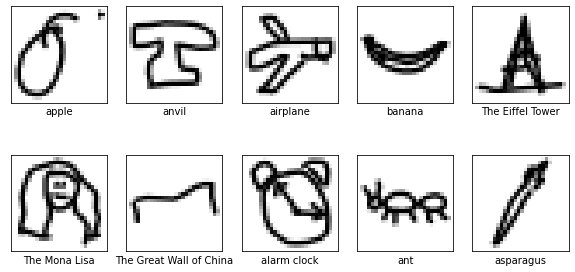

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # the array is decided by the system: (28 x 28)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [12]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)  >>  28 * 28 = 784 
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

### 01- Load data. done above

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print("X_train: ", X_train.shape)
print("X_train[0]: ", X_train[0].shape)
print("X_test: ", X_test.shape)

X_train:  (60000, 28, 28)
X_train[0]:  (28, 28)
X_test:  (10000, 28, 28)


In [8]:
# X_train

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

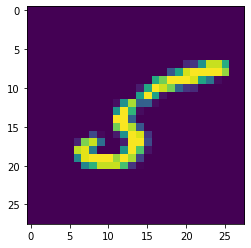

In [9]:
# baseline.history

import matplotlib.pyplot as plt

plt.imshow(X_train[11])

In [10]:
# What is the above image about?
print(y_train[11])

5


In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# X_train.shape

### 02- Model: create - compile

In [13]:
def load_quickdraw10(path):

  return X_train, y_train, X_test, y_test

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [14]:
##### Your Code Here #####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [15]:
# create model
# model = KerasClassifier(build_fn=create_model, verbose=1)
model = KerasClassifier(build_fn=create_model, verbose=1)

# try verbose = 0
# define the grid search parameters
# param_grid = dict(batch_size=batch_size, epochs=epochs)

In [16]:
# The original shape of our input was 60000 images with  pixels  28 x 28. 
# Now reshape our data and split it between train [50000] images and test [10000] images.

X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255


In [18]:
# Encode the data

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)


In [20]:
# Fit the data

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7302 - accuracy: 0.7964
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3279 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.9195
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2511 - accuracy: 0.9281
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2267 - accuracy: 0.9353


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [21]:
mnist_model_32 = create_model()

bt_default = mnist_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7824 - accuracy: 0.7736 - val_loss: 0.3647 - val_accuracy: 0.8915
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3289 - accuracy: 0.9062 - val_loss: 0.2826 - val_accuracy: 0.9154
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.9207 - val_loss: 0.2544 - val_accuracy: 0.9231
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9287 - val_loss: 0.2276 - val_accuracy: 0.9322
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2228 - accuracy: 0.9351 - val_loss: 0.2064 - val_accuracy: 0.9392
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2049 - accuracy: 0.9402 - val_loss: 0.1908 - val_accuracy: 0.9434
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1894 - accuracy: 0.9451 - val_loss: 0.1775 - val_accuracy:

In [22]:
mnist_model_8 = create_model()

bt_small = mnist_model_8.fit(X_train, y_train,
                             # Hyperparameters!
                             epochs=25,
                             batch_size=8,
                             validation_data=(X_test, y_test))

Epoch 1/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.4338 - accuracy: 0.8710 - val_loss: 0.2438 - val_accuracy: 0.9269
Epoch 2/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2098 - accuracy: 0.9386 - val_loss: 0.1719 - val_accuracy: 0.9479
Epoch 3/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1628 - accuracy: 0.9519 - val_loss: 0.1494 - val_accuracy: 0.9523
Epoch 4/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1358 - accuracy: 0.9603 - val_loss: 0.1397 - val_accuracy: 0.9585
Epoch 5/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1194 - accuracy: 0.9640 - val_loss: 0.1252 - val_accuracy: 0.9621
Epoch 6/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1070 - accuracy: 0.9683 - val_loss: 0.1287 - val_accuracy: 0.9618
Epoch 7/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0986 - accuracy: 0.9703 - val_loss: 0.1122 - val_ac

In [23]:
mnist_model_512 = create_model()

bt_large = mnist_model_512.fit(X_train, y_train,
                               # Hyperparameters!
                               epochs=25,
                               batch_size=512,
                               validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 0s 4ms/step - loss: 2.1655 - accuracy: 0.2083 - val_loss: 1.9603 - val_accuracy: 0.3776
Epoch 2/25
118/118 [==============================] - 0s 3ms/step - loss: 1.7494 - accuracy: 0.4683 - val_loss: 1.5233 - val_accuracy: 0.5721
Epoch 3/25
118/118 [==============================] - 0s 3ms/step - loss: 1.3157 - accuracy: 0.6610 - val_loss: 1.0870 - val_accuracy: 0.7428
Epoch 4/25
118/118 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.7727 - val_loss: 0.8048 - val_accuracy: 0.8048
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.8164 - val_loss: 0.6521 - val_accuracy: 0.8375
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.8403 - val_loss: 0.5626 - val_accuracy: 0.8568
Epoch 7/25
118/118 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.8556 - val_loss: 0.5040 - val_accuracy: 0.8678
Epoch 

In [29]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.782357,0.773633,0.364750,0.8915,0,32_
1,0.328922,0.906183,0.282611,0.9154,1,32_
2,0.274629,0.920683,0.254420,0.9231,2,32_
3,0.245431,0.928667,0.227650,0.9322,3,32_
4,0.222806,0.935067,0.206400,0.9392,4,32_


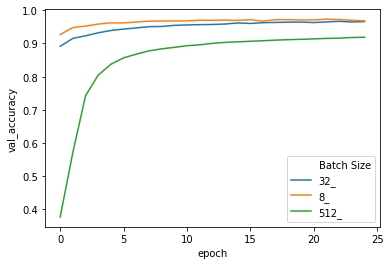

In [30]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

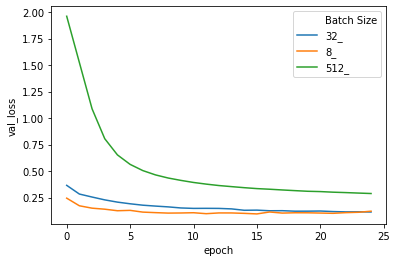

In [31]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [24]:
# lr_default = 0.01
lr_01 = create_model().fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7394 - accuracy: 0.7938 - val_loss: 0.3408 - val_accuracy: 0.9031
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3203 - accuracy: 0.9087 - val_loss: 0.2726 - val_accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9222 - val_loss: 0.2438 - val_accuracy: 0.9297
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2393 - accuracy: 0.9313 - val_loss: 0.2174 - val_accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2167 - accuracy: 0.9374 - val_loss: 0.2025 - val_accuracy: 0.9410
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1975 - accuracy: 0.9436 - val_loss: 0.1863 - val_accuracy: 0.9445
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1832 - accuracy: 0.9477 - val_loss: 0.1775 - val_accuracy:

In [25]:
lr_1 = create_model(lr=1).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8516 - accuracy: 0.2801 - val_loss: 1.7539 - val_accuracy: 0.2938
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7255 - accuracy: 0.2973 - val_loss: 1.6640 - val_accuracy: 0.2752
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6952 - accuracy: 0.2959 - val_loss: 1.6472 - val_accuracy: 0.2939
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8212 - accuracy: 0.2658 - val_loss: 1.7509 - val_accuracy: 0.3009
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7210 - accuracy: 0.2966 - val_loss: 1.7360 - val_accuracy: 0.2897
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7283 - accuracy: 0.2824 - val_loss: 1.6522 - val_accuracy: 0.3034
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8601 - accuracy: 0.2166 - val_loss: 1.9809 - val_accuracy:

In [26]:
lr_0001 = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3060 - accuracy: 0.1164 - val_loss: 2.2656 - val_accuracy: 0.1403
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2382 - accuracy: 0.1531 - val_loss: 2.2094 - val_accuracy: 0.1718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1882 - accuracy: 0.1845 - val_loss: 2.1600 - val_accuracy: 0.2002
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1404 - accuracy: 0.2133 - val_loss: 2.1103 - val_accuracy: 0.2343
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0911 - accuracy: 0.2498 - val_loss: 2.0585 - val_accuracy: 0.2834
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0393 - accuracy: 0.3076 - val_loss: 2.0040 - val_accuracy: 0.3525
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9845 - accuracy: 0.3684 - val_loss: 1.9462 - val_accuracy:

In [27]:
lr__1 = create_model(lr=0.1).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3249 - accuracy: 0.9028 - val_loss: 0.1688 - val_accuracy: 0.9487
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1621 - accuracy: 0.9508 - val_loss: 0.1551 - val_accuracy: 0.9491
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9611 - val_loss: 0.1310 - val_accuracy: 0.9590
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9661 - val_loss: 0.1248 - val_accuracy: 0.9633
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9698 - val_loss: 0.1139 - val_accuracy: 0.9665
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.1106 - val_accuracy: 0.9680
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9742 - val_loss: 0.1324 - val_accuracy:

In [28]:
lr_001 = create_model(lr=.001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0182 - accuracy: 0.3389 - val_loss: 1.5997 - val_accuracy: 0.6048
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2626 - accuracy: 0.6876 - val_loss: 0.9463 - val_accuracy: 0.7526
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8200 - accuracy: 0.7798 - val_loss: 0.6767 - val_accuracy: 0.8185
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6310 - accuracy: 0.8305 - val_loss: 0.5492 - val_accuracy: 0.8554
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5317 - accuracy: 0.8569 - val_loss: 0.4754 - val_accuracy: 0.8720
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4717 - accuracy: 0.8715 - val_loss: 0.4287 - val_accuracy: 0.8855
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4320 - accuracy: 0.8818 - val_loss: 0.3966 - val_accuracy:

In [32]:
batch_sizes = []

for exp, result in zip([lr_0001, lr_001, lr_01, lr__1, lr_1], [".0001_", ".001_", ".01", ".1_", "1_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.306038,0.116367,2.265616,0.1403,0,.0001_
1,2.238177,0.153117,2.209362,0.1718,1,.0001_
2,2.188191,0.184450,2.159992,0.2002,2,.0001_
3,2.140371,0.213350,2.110298,0.2343,3,.0001_
4,2.091093,0.249833,2.058524,0.2834,4,.0001_


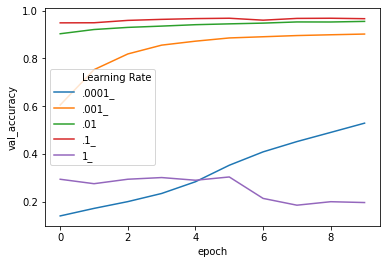

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

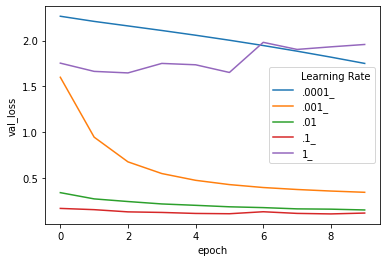

In [34]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [38]:
ep10 = create_model(lr=0.01).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7771 - accuracy: 0.7811 - val_loss: 0.3584 - val_accuracy: 0.8978
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.9032 - val_loss: 0.2946 - val_accuracy: 0.9144
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2860 - accuracy: 0.9178 - val_loss: 0.2586 - val_accuracy: 0.9264
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9277 - val_loss: 0.2333 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2282 - accuracy: 0.9348 - val_loss: 0.2186 - val_accuracy: 0.9355
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2087 - accuracy: 0.9399 - val_loss: 0.1995 - val_accuracy: 0.9432
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1927 - accuracy: 0.9447 - val_loss: 0.1891 - val_accuracy:

In [39]:
ep20 = create_model(lr=0.01).fit(X_train, y_train,
                                epochs=20,
                                validation_data=(X_test,y_test)
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7870 - accuracy: 0.7782 - val_loss: 0.3476 - val_accuracy: 0.9004
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3252 - accuracy: 0.9062 - val_loss: 0.2817 - val_accuracy: 0.9191
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9223 - val_loss: 0.2456 - val_accuracy: 0.9280
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2391 - accuracy: 0.9321 - val_loss: 0.2251 - val_accuracy: 0.9353
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2160 - accuracy: 0.9387 - val_loss: 0.2081 - val_accuracy: 0.9403
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1976 - accuracy: 0.9446 - val_loss: 0.1904 - val_accuracy: 0.9440
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1833 - accuracy: 0.9474 - val_loss: 0.1811 - val_accuracy:

In [40]:
ep30 = create_model(lr=0.01).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8012 - accuracy: 0.7741 - val_loss: 0.3587 - val_accuracy: 0.8962
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.9047 - val_loss: 0.2763 - val_accuracy: 0.9209
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.9210 - val_loss: 0.2395 - val_accuracy: 0.9298
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9301 - val_loss: 0.2163 - val_accuracy: 0.9373
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2161 - accuracy: 0.9370 - val_loss: 0.1980 - val_accuracy: 0.9436
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1983 - accuracy: 0.9425 - val_loss: 0.1912 - val_accuracy: 0.9415
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1849 - accuracy: 0.9465 - val_loss: 0.1773 - val_accuracy:

In [41]:
ep40 = create_model(lr=0.01).fit(X_train, y_train,
                                epochs=40,
                                validation_data=(X_test,y_test)
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7605 - accuracy: 0.7914 - val_loss: 0.3431 - val_accuracy: 0.9045
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.9100 - val_loss: 0.2763 - val_accuracy: 0.9213
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9227 - val_loss: 0.2389 - val_accuracy: 0.9309
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2347 - accuracy: 0.9319 - val_loss: 0.2151 - val_accuracy: 0.9361
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2123 - accuracy: 0.9379 - val_loss: 0.2027 - val_accuracy: 0.9419
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1946 - accuracy: 0.9434 - val_loss: 0.1942 - val_accuracy: 0.9421
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1807 - accuracy: 0.9477 - val_loss: 0.1783 - val_accuracy:

In [42]:
batch_sizes = []

for exp, result in zip([ep10, ep20, ep30, ep40], ["10_", "20_", "30_", "40_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.777093,0.781067,0.358420,0.8978,0,10_
1,0.336773,0.903250,0.294602,0.9144,1,10_
2,0.285973,0.917783,0.258577,0.9264,2,10_
3,0.252886,0.927733,0.233283,0.9327,3,10_
4,0.228227,0.934750,0.218558,0.9355,4,10_


### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation estimates the amount of error for which the weights of a node in the network are responsible.  
Instead of updating the weight with the full amount, it is scaled by the learning rate.  
* Back propagation is to update the weight and see the change in errors
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


